<a href="https://colab.research.google.com/github/davidheram/Random-Forest-Project/blob/main/RandomForest_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
df = pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=930&path=diabetes.csv")


In [127]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [128]:
df.shape

(768, 9)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [130]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [131]:
(df == 0).sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500


In [132]:
df["Outcome"].value_counts(normalize=True)*100

,proportion
Outcome,
0,65.104167
1,34.895833


<Axes: xlabel='Outcome', ylabel='count'>

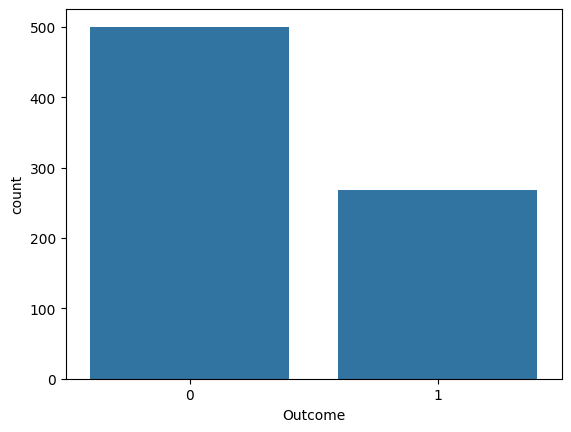

In [133]:
sns.countplot(x="Outcome",data=df)

<Axes: >

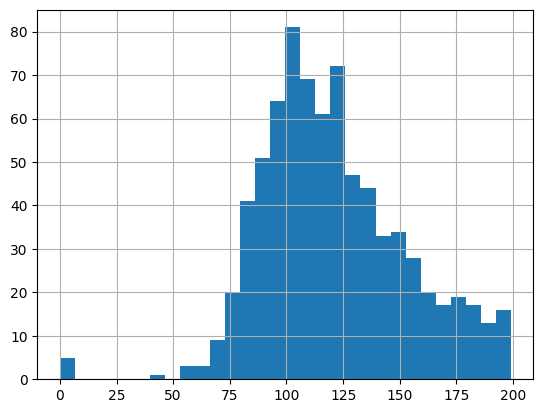

In [134]:
df["Glucose"].hist(bins=30)

In [135]:
cols_zero = ["Glucose", "BloodPressure","SkinThickness","Insulin","BMI"]
df[cols_zero] = df[cols_zero].replace(0, np.nan)

for col in cols_zero:
  df[col].fillna(df[col].median())

<Axes: xlabel='Outcome', ylabel='Glucose'>

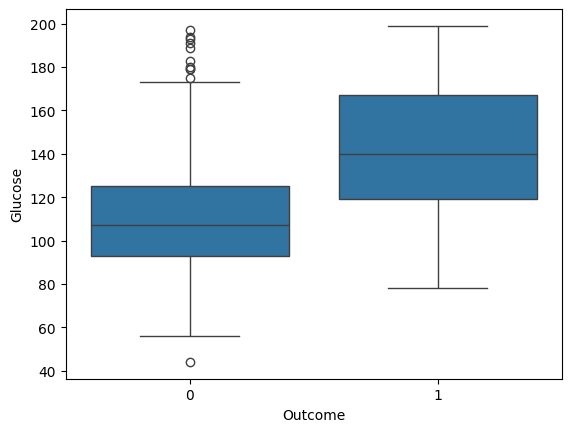

In [136]:
sns.boxplot(x="Outcome", y="Glucose", data=df)

<Axes: xlabel='Outcome', ylabel='BMI'>

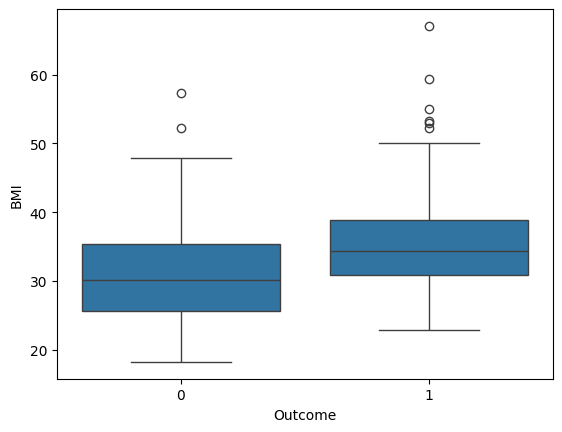

In [137]:
sns.boxplot(x="Outcome", y="BMI", data=df)

<Axes: xlabel='Outcome', ylabel='Age'>

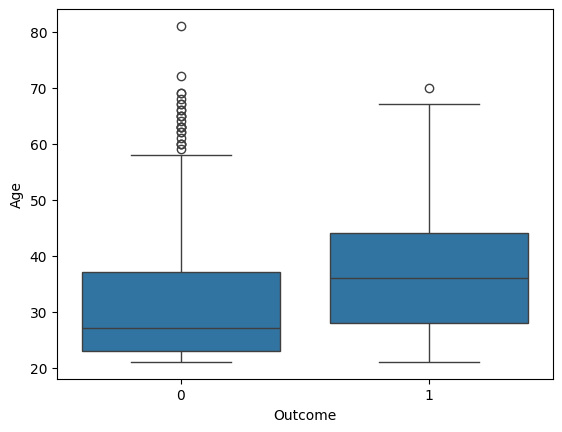

In [138]:
sns.boxplot(x="Outcome", y="Age", data=df)

<Axes: >

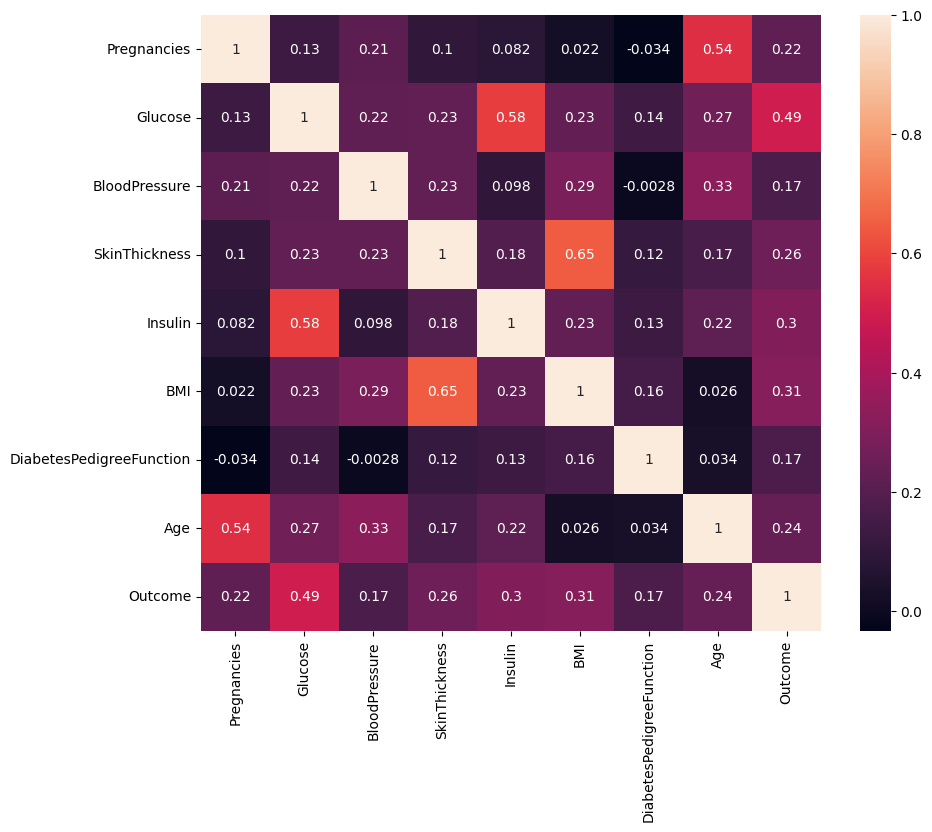

In [139]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

In [140]:
df.corr()["Outcome"].sort_values(ascending=False)

,Outcome
Outcome,1.000000
Glucose,0.494650
BMI,0.313680
Insulin,0.303454
SkinThickness,0.259491
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
BloodPressure,0.170589


In [141]:
X=df.drop(columns="Outcome")
y=df["Outcome"]

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [143]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=100, max_depth=26, min_samples_split=124)

dt_model.fit(X_train, y_train)
predict = dt_model.predict(X_test)

In [144]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        96
           1       0.71      0.71      0.71        58

    accuracy                           0.78       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154



In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

def grid_RandomForest(X_train, y_train):
  model = RandomForestClassifier(random_state=0)
  n_estimators = np.arange(100,500,100)
  criterion = ['gini', 'entropy']
  min_samples_split = [0.05, 0.1,]
  max_depth = [7,12,20]
  grid = dict(n_estimators = n_estimators, criterion = criterion,
              min_samples_split = min_samples_split, max_depth = max_depth)
  cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=1)
  grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv,
                            scoring='roc_auc',error_score='raise')
  grid_result = grid_search.fit(X_train, y_train)
  return  grid_result.best_estimator_

In [153]:
best_model = grid_RandomForest(X_train, y_train)
preds = best_model.predict(X_test)
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       101
           1       0.69      0.75      0.72        53

    accuracy                           0.80       154
   macro avg       0.78      0.79      0.78       154
weighted avg       0.80      0.80      0.80       154



In [152]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, preds)

0.7987012987012987

In [148]:
best_model

RandomForestClassifier(criterion='entropy', max_depth=20,
                       min_samples_split=0.05, n_estimators=np.int64(300),
                       random_state=0)

In [158]:
from pickle import dump

with open("decision_tree_diabetes.pkl","wb") as file: pickle.dump(best_model, file)